# Numpy

In [1]:
import numpy as np

The core of the `numpy` package is the `array` class. Let's examine that first. We can make an array out of a sequence, like a list.

In [2]:
d = [1, 2, 3, 4, 5]
np.array(d)

array([1, 2, 3, 4, 5])

### data types

Unlike lists, arrays must be homogeneous, in that the data types of each element must be the same. The data type of the array is upcast to be able to represent all of the data. So, if only one element is a float, all elements will be converted to floats.

In [3]:
d = [1, 2, 3.1415, 4, 5]
np.array(d)

array([1.    , 2.    , 3.1415, 4.    , 5.    ])

You can query the datatype by examining the `dtype` attribute of the array.

In [4]:
d = [1, 2, 3.1415, 4, 5]
arr = np.array(d)
arr.dtype

dtype('float64')

Array types may be defined explicity in the call

In [5]:
arr = np.array([1, 2, 3, 4, 5], dtype='float32')
arr

array([1., 2., 3., 4., 5.], dtype=float32)

Complex numbers are noted with a lowercase `j` or uppercase `J`, like this

In [6]:
cmplx = np.array([1.0+2.0j, 3.0+4.0J])
print(cmplx)
cmplx.dtype

[1.+2.j 3.+4.j]


dtype('complex128')

As we have seen before, arrays are like multidimensional sequences. We can create a 2D array by supplying a list of lists as the argument.

In [7]:
arr = np.array([[1., 2., 3.,], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

### Array attributes

Arrays have a few other important attributes. Note attributes never have parentheses after them. Methods always do.

In [8]:
arr.size          # The number of elements in the array

6

In [9]:
arr.shape         # The shape of the array (i.e., the size of each dimension)

(2, 3)

In [10]:
arr.ndim          # The number of dimensions of the array

2

### Setting array shape

You can set the `array.shape` attribute to change the shape of the array. This attribute does not change the elements of the array, or how it is stored in memory, just how it is seen.

In [11]:
arr.shape = (3, 2)
arr

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [12]:
arr.shape = (6,)
arr

array([1., 2., 3., 4., 5., 6.])

Singleton dimensions add to the dimensionality of an array. The last example was a 1D array (also called a vector), the next are 2D arrays.

In [13]:
arr.shape = (1, 6)
arr   # Note that there are *two* square brackets in the output sequence. This is a row vector.

array([[1., 2., 3., 4., 5., 6.]])

In [14]:
arr.shape = (6, 1)
arr   # this is also a 2D array, like a column vector

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.]])

## Array indexing

Arrays are indexed in a similar way to sequences, with `start:stop:stride` notation, except that this is used for each dimension in the array. Colons denote all the values in a particular dimension, slices indicate some particular subset of the data in that particular dimension. 

A common use case is to get a single row or column from a 2D array (a table of data).

In [15]:
arr = np.arange(60).reshape(6, 10)
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]])

In [16]:
arr[:, 4]   # the 5th column

array([ 4, 14, 24, 34, 44, 54])

In [17]:
arr[2, :]   # the 3rd row

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [18]:
arr[2]     # Trailing colons do not need to be explicitly typed. This is equivalent to the last example.

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [19]:
arr[4, 7]   # an individual element in the table

47

---
### *Exercise*

> Slices can be combined in any way. Define a new array or use array `arr` and grab out every other row and the 4th column and beyond.

---

### Conventions concerning arrays containing spatio-temporal information

Generally, you will want to think of arrays as representing dimensions in space and time. The conventional way to think of this is that the dimensions are $(t, z, y, x)$; missing dimensions are omitted. This will help make plotting and analysis easier. Some examples might be:

    temp[:, :, :, :]     # A 4D array (time, height, latitude, longitude)
    press[:, :]          # A 2D array (time, height)
    humid[:, :]          # A 2D array (latitude, longitude)

## Array methods

Arrays have a number of methods. Let's take a look at the `mean` method as an example. 

In [20]:
arr = np.array([[1., 2., 3.,], [4., 5., 6.]])  # reset the array to our 2x3 array.

arr.mean()        # The mean of all of the elements in the array

3.5

`Mean` takes the optional argument `axis` that can be used to take the mean along a single axis of the array. Just like with indexing, the axes are reference in a zero-based system; `axis=0` means the first dimension. 

In [21]:
arr.mean(axis=0)  # The mean 

array([2.5, 3.5, 4.5])

In this case, there are two rows in the first dimension, and `arr.mean(axis=0)` takes the average in the 'row' direction, resulting in a 1D array that is the average across the rows.

---
### *Exercise*

> Find the mean of the array in the 'column' direction, along `axis=1`.

> Use the `sum` method of the array class to get the sum of the numbers in each column. The result should be a 1D array with three elements.

---

You can also use the `reshape` method to change the shape of an array.

In [22]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [23]:
arr.reshape(3, 2)

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

You can find the mininum and maximum of an array with the `min` and `max` methods. Sometimes it is useful to find the indices of these minima and maxima. For this use `argmin` and `argmax`, like

In [24]:
x = np.random.rand(10)
imax = x.argmax()
print(imax, x[imax], x.max())

2 0.8543847241182848 0.8543847241182848


## Creating standard arrays

There are a few standard arrays, for example, arrays filled with zeros or ones (or empty). Here are some examples of creating arrays.

In [25]:
o = np.ones((3, 4, 5))    # The argument is a shape, so is a tuple with the length of each dimension as an argument
b = np.ones((2, 3), dtype=np.bool)
z = np.zeros((2, 3), dtype=np.float32)

b

array([[ True,  True,  True],
       [ True,  True,  True]])

You can also create these arrays with the same shape and datatype of the input array using `np.ones_like` and `np.zeros_like`.

In [26]:
zb = np.zeros_like(b)
zb

array([[False, False, False],
       [False, False, False]])

You can also create a diagonal array with a given vector along the diagonal. These can be offset with an optional argument `k` (default=0). This example creates a tri-diagonal array similar to that used for finite difference calculations

In [27]:
np.diag(-2*np.ones(6)) + np.diag(np.ones(5), k=-1) + np.diag(np.ones(5), k=1)

array([[-2.,  1.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  1., -2.]])

There are also a number of ways to generate sequences of numbers.
 - `np.arange([start,] stop [[, stride]])` Create a sequence of numbers, similar to `range`
 - `np.linspace(min, max, length)` Create a uniform series of specified `length` between `min` and `max`, inclusive.
 - `np.logspace(minpow, maxpow, length)` Create a uniform series in logspace of specified `length` between `10**minpow` and `10**maxpow`, inclusive.
 

In [28]:
np.arange(10.)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [29]:
np.arange(2, 10, 2)

array([2, 4, 6, 8])

In [30]:
np.linspace(2, 4, 17)

array([2.   , 2.125, 2.25 , 2.375, 2.5  , 2.625, 2.75 , 2.875, 3.   ,
       3.125, 3.25 , 3.375, 3.5  , 3.625, 3.75 , 3.875, 4.   ])

You can create arrays of random numbers easily with methods in `np.random`.

* `np.random.rand(d0, d1, ..., d2)`: Create an array of the given shape `d0, ..., dn` and populate it with random samples from a uniform distribution over [0,1).
* `np.random.randint(low, high=None, size=None)`: Return random integers from `low` (inclusive) to `high` (exclusive). If `high` is None then return integers from [0, `low`). `size` is an int or tuple of ints to give the output shape.
* `np.randon.randn(d0, d1, ..., d2)`: Create an array of the given shape `d0, ..., dn` and populate it with random samples from the "standard normal" distribution.
* `np.random.random(size=None)`: Return random floats of `size` (int or tuple of ints) in the interval [0, 1).

In [31]:
np.random.rand(2, 4)

array([[0.97933169, 0.8412156 , 0.44210109, 0.19383956],
       [0.06341264, 0.33351528, 0.14418935, 0.00814402]])

In [32]:
np.random.randint(1, 50, (2, 4))

array([[15, 13, 30, 45],
       [15, 34, 23, 35]])

---
### *Exercise*

> Create an array of random floats between 0 and 1 that has dimension 5 x 3. Calculate the standard deviation of the columns of the array. Then add to this a `linspace` array of the appropriate size that contains numbers between 10 and 15.

---

## Combining and splitting arrays

Generally, arrays can be combined with the `np.concatenate` function. The arguments are a sequence of arrays to join, and the axis along which to join them (default=0).




In [33]:
x = np.random.rand(4, 5, 6)
y = np.random.rand(4, 5, 6)

print(np.concatenate((x, y)).shape)
print()
print(np.concatenate((x, y), axis=0).shape)
print(np.concatenate((x, y), axis=1).shape)
print(np.concatenate((x, y), axis=2).shape)


(8, 5, 6)

(8, 5, 6)
(4, 10, 6)
(4, 5, 12)


There are a number of convenience functions that act like concatenate for specific axes:

 - `np.vstack` – vertical stack (stack along axis=0)
 - `np.hstack` – horizontal stack (stack along axis=1)
 - `np.dstack` – depth stack (stack along axis=2)


In [34]:
print(np.vstack((x, y)).shape)
print(np.hstack((x, y)).shape)
print(np.dstack((x, y)).shape)

(8, 5, 6)
(4, 10, 6)
(4, 5, 12)


Likewise, arrays can be split with `np.split` or `np.array_split`. There are also convenience functions to split horizontally, vertically, and with depth.

In [35]:
x = np.random.rand(12, 2, 5)
[a.shape for a in np.split(x, 4, axis=0)]

[(3, 2, 5), (3, 2, 5), (3, 2, 5), (3, 2, 5)]

---
### *Exercise*

> Create an array, A, of shape (40, 50, 60). The array slices for first ten entries in the axis=1 direction of A should be filled with 1's, for the next ten filled with 2's, and on up to 5's.

> Split it along axis=1 into five sections.

> Concatenate two of these back together along axis 1.

> What is the resulting shape of each array?  _[Advanced: can you calculate this on one line?]_

---

## Finding values

There are a number of ways to find values in an array. The simplest is always to create a boolean array, like

In [36]:
x = np.random.rand(5, 5)
print(x)
ind = x > 0.5
print(ind)

[[0.88218413 0.11941793 0.56426898 0.10745389 0.16788938]
 [0.03706232 0.23345022 0.96668672 0.43419534 0.60182722]
 [0.59004368 0.25055649 0.85829665 0.81465313 0.46608578]
 [0.8644219  0.37140038 0.40825581 0.04305937 0.44408972]
 [0.68734153 0.89093474 0.84676509 0.9031388  0.70068568]]
[[ True False  True False False]
 [False False  True False  True]
 [ True False  True  True False]
 [ True False False False False]
 [ True  True  True  True  True]]


The boolean array can be used as an index to other arrays. Note this will return a 1D array, no matter what dimension the original arrays are, because there is no way to know what structure the `True` values have.

In [60]:
x = np.random.rand(5, 5)
y = np.sin(x)

y[x > 0.5]
# or, equivalently, as two lines
idx = x > 0.5
y[idx]

array([ 0.63127609,  0.775866  ,  0.71526395,  0.77716728,  0.66380859,
        0.57566832,  0.77979431,  0.79410003,  0.81556793,  0.82887742])

To get the indices of the places where the conditional is true (i.e., the locations of the `True` values in the boolean array), use the `np.where` command. 

In [37]:
x = np.random.rand(5, 5)
idx = np.where(x > 0.5)
idx

(array([0, 0, 1, 1, 1, 2, 2, 2, 2, 4, 4], dtype=int64),
 array([0, 3, 1, 2, 3, 0, 1, 2, 4, 0, 2], dtype=int64))

Note that `np.where` always returns a tuple of indices for each dimension. This is a little strange for 1D arrays, but is done for consistency across all input values. Often, you will want to explicitly pull out the (single) array of indices from the tuple, like

In [38]:
x = np.random.rand(10)
idx = np.where(x>0.5)[0]
print(idx)

[2 3 4 5 6 7 8 9]


_What happens with the [0] is missing behind the call to `where`?_

---
### *Exercise*

> You can also use these calculated indices, or boolean matrices on the left hand side for assignment.

> Create a 10x10 random array, with values between 0 and 1. Replace all of the numbers smaller than 0.5 with zero.

> Do this first not using `where` and then do it using `where`.

---

## Array views

The data for an array may be stored in memory using `C` or `FORTRAN` ordered memory. Typically, there is no need to think about this, some details can be found [here](http://docs.scipy.org/doc/numpy-1.10.0/reference/internals.html).

However, it is important to remember that subsets of an array can produce a different 'view' of the array that addresses the same memory as the original array. This can lead to some unexpected behaviors. One way to think of this is that assignment in Python is more like a C-pointer (i.e., a reference to a memory location) than an actual value.

In [39]:
a = np.arange(10.0)
b = a[::2]
print(a)
print(b)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 2. 4. 6. 8.]


In [40]:
a[4] = -999   # this will modify b as well...
print(a)
print(b)

[   0.    1.    2.    3. -999.    5.    6.    7.    8.    9.]
[   0.    2. -999.    6.    8.]


In [41]:
b[-1] = -888  # this will modify a as well...
print(a)
print(b)

[   0.    1.    2.    3. -999.    5.    6.    7. -888.    9.]
[   0.    2. -999.    6. -888.]


Normally, this will not be a problem, but if you need to make sure that a subset of an array has it's own memory, make sure you make a `copy` of the array, like

In [42]:
a = np.arange(10.0)
b = a.copy()[::2]     # or np.copy(a)
a[4] = -999   # this will NOT modify b now
print(a)
print(b)

[   0.    1.    2.    3. -999.    5.    6.    7.    8.    9.]
[0. 2. 4. 6. 8.]


## Array broadcasting

(Largely taken from [SciPy docs](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html))

Generally arrays should be the same shape for them to be multiplied together. 

In [43]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

The term broadcasting describes how `numpy` treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations.

For example, the simplest broadcasting example occurs when an array and a scalar value are combined in an operation:

In [44]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

The result is equivalent to the previous example where b was an array. We can think of the scalar b being stretched during the arithmetic operation into an array with the same shape as a. The new elements in b are simply copies of the original scalar. The stretching analogy is only conceptual. NumPy is smart enough to use the original scalar value without actually making copies, so that broadcasting operations are as memory and computationally efficient as possible.

The code in the second example is more efficient than that in the first because broadcasting moves less memory around during the multiplication (b is a scalar rather than an array).

### General Broadcasting Rules

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when

1. they are equal, or
1. one of them is 1

If these conditions are not met, a ValueError: frames are not aligned exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the maximum size along each dimension of the input arrays.

Arrays do not need to have the same number of dimensions. For example, if you have a 256x256x3 array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

    Image  (3d array): 256 x 256 x 3
    Scale  (1d array):             3
    Result (3d array): 256 x 256 x 3

When either of the dimensions compared is one, the other is used. In other words, dimensions with size 1 are stretched or “copied” to match the other.

In the following example, both the A and B arrays have axes with length one that are expanded to a larger size during the broadcast operation:

    A      (4d array):  8 x 1 x 6 x 1
    B      (3d array):      7 x 1 x 5
    Result (4d array):  8 x 7 x 6 x 5
    
Here are some more examples:

    A      (2d array):  5 x 4
    B      (1d array):      1
    Result (2d array):  5 x 4

    A      (2d array):  5 x 4
    B      (1d array):      4
    Result (2d array):  5 x 4

    A      (3d array):  15 x 3 x 5
    B      (3d array):  15 x 1 x 5
    Result (3d array):  15 x 3 x 5

    A      (3d array):  15 x 3 x 5
    B      (2d array):       3 x 5
    Result (3d array):  15 x 3 x 5

    A      (3d array):  15 x 3 x 5
    B      (2d array):       3 x 1
    Result (3d array):  15 x 3 x 5
    
Let's create an example with arrays of random numbers.

In [45]:
A = np.random.rand(15, 3, 5)
B = np.random.rand(3, 1)
print(A.shape, B.shape)

Result = A * B
print(Result.shape)

(15, 3, 5) (3, 1)
(15, 3, 5)


Here are examples of shapes that do not broadcast:

    A      (1d array):  3
    B      (1d array):  4 # trailing dimensions do not match

    A      (2d array):      2 x 1
    B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched

---
### *Exercise*

    a = np.random.rand(5, 7, 1, 8)
    b = np.random.rand(8)
    c = np.random.rand(7, 3, 8)
    d = np.random.rand(5, 1, 3, 1)

> Experiment with multiplying combinations of the arrays above together. Try to predict the resulting shape beforehand.

---

Notice that the rules for broadcasting are based on the location of singleton dimensions. Singleton dimensions are implied forward (to the left), but not backward (to the right). So, the first example here works but not the second:

    A      (2d array):  5 x 4
    B      (1d array):      4
    Result (2d array):  5 x 4

    A      (2d array):  5 x 4
    B      (1d array):  5


*Compare with large set of examples above. How can the bottom example here be fixed?*

This problem can be fixed by creating new singleton dimensions in arrays. This can be done by putting `np.newaxis` in the appropriate space when indexing the array. For example:

In [46]:
A = np.random.rand(5, 4)
B = np.random.rand(5)
A*B

ValueError: operands could not be broadcast together with shapes (5,4) (5,) 

In [47]:
print(B.shape)
print(B[:,np.newaxis].shape)

(5,)
(5, 1)


In [48]:
(A*B[:,np.newaxis]).shape

(5, 4)

---
### *Exercise*

> Multiply `b = np.random.rand(8)` and `c = np.random.rand(8, 3, 7)`. What is another way you could accomplish this calculation besides using `newaxis`?

---

---
### *Exercise*

    b = np.random.rand(2)
    c = np.random.rand(2, 3)
    
> Concatenate arrays `b` and `c`. Along which axis would it make sense to concatenate, given the arrays dimensions? Do you need to make any changes to the arrays to get this to work?

---

## Flattening arrays with `a.flat` and `a.flatten()`

There are two basic ways to turn any array into a 1D array. They are slightly different.

`a.flatten()` returns a copy of an array, in one dimension.

In [49]:
a = np.arange(12).reshape(3, 4)
print(a)
b = a.flatten()
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


the `flat` attribute on the other hand gives a view of the array in 1D. It looks like an iterator object (like `range` and `zip`). This allows

In [50]:
a.flat[6] = -999
print(a)

[[   0    1    2    3]
 [   4    5 -999    7]
 [   8    9   10   11]]


In contrast, this does not work as expected.  _WHY?_

In [51]:
a.flatten()[5] = -888
print(a)

[[   0    1    2    3]
 [   4    5 -999    7]
 [   8    9   10   11]]


Other operations can be done to the array first. For example, we can take a transpose of the array before we flatten it.

In [52]:
a.T.flat[6] = -998
print(a)

[[   0    1 -998    3]
 [   4    5 -999    7]
 [   8    9   10   11]]


Here, the `T` attribute (equivalent to the `a.transpose()` method) gives a view of the array transposed (similar to MATLAB's tick notation).

In [53]:
print(a.T)

[[   0    4    8]
 [   1    5    9]
 [-998 -999   10]
 [   3    7   11]]


## Masked arrays

Masked arrays are ways to create arrays with missing values. MATLAB&trade; uses NaNs (NaN stands for 'Not a Number'), and the NaNs are the values of the arrays at those points. This approach also works in Python. Masked arrays are preferred since they retain the masked array values, and also some plotting routines require masked arrays when plotting arrays with missing values. Masked arrays are usually created through some condition, like

In [54]:
arr = np.random.randn(7, 8)
cond = arr > 0.1   # `cond` is True for the random values greater than 0.5

marr = np.ma.masked_where(cond, arr)

print(marr)

[[-1.0881231430840717 -- -- -0.06985895153151903 -0.39456844028410526 --
  -1.7116262824370327 -0.17846849164952305]
 [-1.8048114563498148 -- -0.25444776267871955 -- -- -1.1776662904468627
  -0.7111613569343161 -0.6102787625078961]
 [-- -- -1.1671217822071174 -0.6249870443627835 -- -- -- --]
 [-- -- -0.019252698583875287 -- -- -0.47948803395405715
  -0.5895968677414788 --]
 [-0.4253115230748398 -0.3404689807526255 -0.7151437858644933 --
  -0.1795564538306736 -1.3920093961197206 -- -0.2424062302999424]
 [-1.3590808650333912 -- -- -- -- -- -- -1.235334603744818]
 [-0.24708919741345134 -- -0.5710299686799074 -- -0.7281928671548296 --
  -- -0.0976455716711964]]


In [55]:
marr.mean(axis=0)

masked_array(data=[-0.9848832369911138, -0.3404689807526255,
                   -0.5453991996028226, -0.34742299794715126,
                   -0.4341059204232028, -1.0163879068402135,
                   -1.0041281690376092, -0.47282673197467523],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=1e+20)

The mask can also be supplied explicity when creating the masked array,

In [56]:
marr = np.ma.masked_array([1, 2, 3, 4, 5], mask=[True, True, False, False, True])
marr

masked_array(data=[--, --, 3, 4, --],
             mask=[ True,  True, False, False,  True],
       fill_value=999999)

## Importing data

One of the basic commands in `numpy` for loading in data is the `loadtxt` command. There are other ways to do this, such as the [`genfromtxt`](http://docs.scipy.org/doc/numpy-dev/user/basics.io.genfromtxt.html) command, but `loadtxt` is sufficient for most purposes, and is easy to use.

In [ ]:
### Only uncomment the following lines if using Google Colab to run this notebook
### uncomment the two lines below here
#from google.colab import drive
#drive.mount('/content/gdrive')  # you'll need to click the link and authorize the notebook to access your Google drive
                                 # then paste the authorization code into the box here; you'll need to use Ctrl+V to paste. 


    
### now go to the file explorer on the right hand side of your Colab notebook and navigate to the folder where your notebook is located
### the path shown below is the path on my Google drive; yours may differ
### uncomment the three lines below here
#your_directory_path = '/content/gdrive/MyDrive/python4geosciences/materials/Module 3'
#import os
#os.chdir(your_directory_path)

In [57]:
data = np.loadtxt('../data/CTD.txt', comments='*')
data[:,2]    # a column of data representing temperature
data

array([[ 2.013   ,  2.      , 26.5827  , 26.5823  ,  4.575059, 28.6303  ,
        18.0579  ,  4.62032 ,  3.1596  , 56.9022  ,  2.8503  ,  0.62493 ,
         0.3862  ,  3.9016  ,  2.6426  ,  2.5965  ,  1.731   ],
       [ 2.515   ,  2.5     , 25.9263  , 25.9258  ,  4.727182, 30.1208  ,
        19.3798  ,  4.37469 ,  3.0143  , 60.8058  ,  3.0417  ,  0.55938 ,
         0.339   ,  3.7094  ,  2.6212  ,  2.6264  ,  1.751   ],
       [ 3.02    ,  3.      , 25.3695  , 25.3688  ,  4.983968, 32.35    ,
        21.2286  ,  4.04875 ,  2.8266  , 74.4409  ,  3.7104  ,  0.49003 ,
         0.2819  ,  2.6419  ,  2.4727  ,  2.3413  ,  1.5609  ],
       [ 3.524   ,  3.5     , 25.2304  , 25.2296  ,  5.016042, 32.6833  ,
        21.5222  ,  3.86168 ,  2.7138  , 77.8474  ,  3.8774  ,  0.44482 ,
         0.2396  ,  1.9937  ,  2.3524  ,  1.8684  ,  1.2456  ],
       [ 4.026   ,  4.      , 24.568   , 24.5671  ,  5.051934, 33.4325  ,
        22.2871  ,  3.42057 ,  2.4863  , 80.6842  ,  4.0166  ,  0.4113  ,
    

---
### *Exercise*

> Read in the oceanographic data file '../data/CTD.txt' into an array. You can look at the data file itself to see what variables are stored in each column.

> Using this data, write a function to calculate the linear equation of state. This is an approximation of the density of water, as it depends on salinity, temperature, and some empirical constants. We will use the following form for the linear equation of state:

> $\rho = 1027[1+7.6\times 10^{-4}(S-35) -1.7\times 10^{-4}(T-25)]$

> where $\rho$ is the density, $S$ is the salinity, and $T$ is the temperature.

> This is more free form than the homework, so you should set up all of the associated code to call the function, and write out the function yourself. Don't forget docstrings! For a check, the first value of your density array in order should equal 1021.7519981630001 and the last should equal 1028.0471353619998.

---

## Polynomial fitting

The basic function for fitting a polynomial (e.g., a straight line) is `np.polyfit(x, y, deg)`. There are a number of other functions that let you add (`np.polyadd`), multiply (`np.polymul`), find zeros (`np.roots`), and do other operations to polynomials.

In [58]:
x = np.random.rand(100)
y = 5 + 3*x + 0.1*np.random.randn(100)   # A straight line with some noise

p = np.polyfit(x, y, 1)  # fit a straight line (order is 1)
print(p)  # The coefficients of the polynomial, with highest order first. (i.e,. [slope, intercept])

[3.03335589 4.97700918]


Let's plot it to make sure this makes sense:

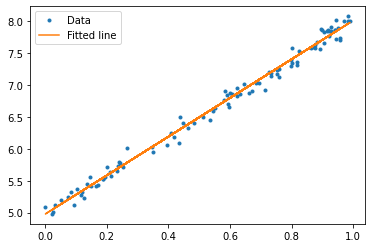

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot data
plt.plot(x, y, '.')

# plot fitted line
plt.plot(x, p[0]*x + p[1])

plt.legend(('Data', 'Fitted line'))

Once you have the fit, you can use it to find other useful things, like the value of the fitted line at $x=1$:

In [60]:
np.polyval(p, 1)

8.01036507296102

You can also use the `np.polynomial.Polynomial` class to work with polynomials. Note, these define polynomials the opposite way, with the _lowest_ order first. The Polynomial class gives an excellent example of operator overloading, and the flexibility of classes.

In [61]:
p1 = np.polynomial.Polynomial([5, 3])         # y = 5 + 3 x
p2 = np.polynomial.Polynomial([3, 6, 8, 2])   # y = 3 + 6 x + 8 x**2 + 2 x**3

You can use the Polynomial object to evaluate the value of the polynomial at various input values:

In [62]:
print('Evaluation')
print('p1(0.0) = ', p1(0))
print('p2(5.0) = ', p2(5))

Evaluation
p1(0.0) =  5.0
p2(5.0) =  483.0


We can use this to make a plot to see the function:

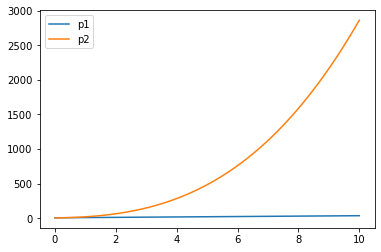

In [63]:
x = np.linspace(0,10)
plt.plot(x, p1(x), x, p2(x))
plt.legend(['p1', 'p2'])

Other things we can do:

In [64]:
print('Roots')
print('Roots of p2 = ', p2.roots())
print()
print('Operations')
print('p1 + p2 = ', p1 + p2)
print('p1 * p2 = ', p1 * p2)
print()
print('Calculus')
print('Derivative of p1', p1.deriv(1))
print('Integral of p2', p2.integ(4, k=[4, 3, 2, 1]))

Roots
Roots of p2 =  [-3.2112427 +0.j         -0.39437865-0.55818847j -0.39437865+0.55818847j]

Operations
p1 + p2 =  poly([8. 9. 8. 2.])
p1 * p2 =  poly([15. 39. 58. 34.  6.])

Calculus
Derivative of p1 poly([3.])
Integral of p2 poly([1.         2.         1.5        0.66666667 0.125      0.05
 0.02222222 0.00238095])


## Vectorization

Vectorization and array broadcasting are two big reasons that `numpy` can be efficient and fast. With these tools, you can avoid writing for loops (which are slow).

The best way to do mathematical operations using `numpy` arrays is to do `vector` operations. That is, mathematical operations are defined to be element by element, and this is done much faster than looping. As a rule of thumb, you should be very concerned if your code has more than one significant `for` loop in the numerical analysis section.

Here is a way to do multiply 2 big arrays using for loops, which is not how you should do it. The sum at the end is included for comparison with the subsequent approach.

In [65]:
a = np.arange(102400.0).reshape(4, 8, 1600, 2)   # a 4D array using sequential numbers
b = np.random.rand(4, 8, 1600, 2)                # a 4D array using random numbers

li, lj, lk, lm = b.shape  # size of b in each dimension
sol = np.zeros(b.shape)
for i in range(li):
    for j in range(lj):
        for k in range(lk):
            for m in range(lm):
                sol[i,j,k,m] = a[i,j,k,m]*b[i,j,k,m]
print(sol.sum())

2617700322.7307653


The better way is to directly multiply the arrays together, taking advantage of C code that Python has in the background.

In [66]:
sol = a * b       # element-by-element multiplication. This operation is about as fast as it can be on your computer.
print(sol.sum())

2617700322.7307653


## Basic performance evaluation

We can do some very basic perfomance testing using the `%time` special function in jupyter notebooks. Lets use this to examine the time it takes to do a singular value decomposition for different sized matrices.

In [67]:
b = np.random.randn(5000, 2000)
%time u, s, v = np.linalg.svd(b)

Wall time: 2.42 s


`%time` runs the line once and gives the time required. However, calculation times vary depending on many things including the numbers involved and the state of your computer at the moment. In this case, the `%timeit` function can be used to perform the test a number of times to get an average calculation time.

In [68]:
%timeit b = np.random.randn(50, 20); u, s, v = np.linalg.svd(b)

108 µs ± 340 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


For statements that are longer than a single line, the `time.time` function can be used.

In [69]:
import time

t_start = time.time()
time.sleep(0.25)   # Do nothing for 0.25 seconds
t_stop = time.time()

print('{:6.4f} seconds have passed.'.format(t_stop-t_start))

0.2501 seconds have passed.


---
### *Exercise*

> Earlier, we discussed using array operations instead of looping because it is faster. Let's compare.

> Calculate the time it takes to calculate the $a$ and $b$ arrays with dimensions [4, 8, 1600, 2] by both methods demonstrated: using a series of 4 `for` loops, one for each dimension of the arrays and using array operations. Compare the times by calculating a ratio.

---

## Linear algebra

One of the key elements of the `numpy` package is the `numpy.linalg` subpackage that contains a number of linear algebra functions that work efficiently on arrays.

In [70]:
a = np.random.randn(100, 100)
e, v = np.linalg.eig(a)

b = np.random.randn(500, 200)
u, s, v = np.linalg.svd(b)

Matrix multiplication is done using the `np.dot` function. In this case, matrices do _not_ need to be the same shape, but must follow the rules of matrix multiplication. E.g., the operation dot(<4x5 array>, <5x12 array>) results in a 4x12 array; i.e., the inner dimensions must match (technically last and second-to-last, for arrays with more than two dimensions).   

In [71]:
x = np.random.rand(4, 5)
y = np.random.rand(5, 12)

res = np.dot(x, y)
print(res.shape)

# np.dot(y, x)  # This gives an error -- order is important.

(4, 12)


---
---
### *Exercise*

> Output from a numerical model of the northwestern Gulf of Mexico are saved in a file `../data/model.npz`. Read in this file using `np.load`. Among other things, it contains `h`, the depths within the numerical domain, and `ssh`, the sea surface heights at two time steps. The sea surface height gives the deviation above and below sea level from a reference water level (which changes in time as the water moves), and the depths of the seabed are also given with respect to that reference water level. 

> Find the full water column depth, between the seabed and the sea surface, for the two given times. 

> You can use as a comparison that at the first time step the [0,0] value of this array should be 3007.6088347392124, and at the second time step the [0,-1] value should be 605.25282427018749. Note that there is a differences between the two time steps though it is generally quite small since it is the difference between time steps in the numerical circulation model.

> Don't forget array conventions, repeated here for convenience:

    Generally, you will want to think of arrays as representing dimensions in space and time. The conventional way to think of this is that the dimensions are $(t, z, y, x)$; missing dimensions are omitted. This will help make plotting and analysis easier. Some examples might be:

    temp[:, :, :, :]     # A 4D array (time, height, latitude, longitude)
    press[:, :]          # A 2D array (time, height)
    humid[:, :]          # A 2D array (latitude, longitude)
---